In [ ]:
from keras import datasets, models, utils, callbacks, layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

#Reading Data

In [ ]:
(x_train, y_train), (x_test, y_test)= datasets.cifar10.load_data()

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
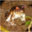

In [ ]:
x_train[0]

In [ ]:

x_train.size

153600000

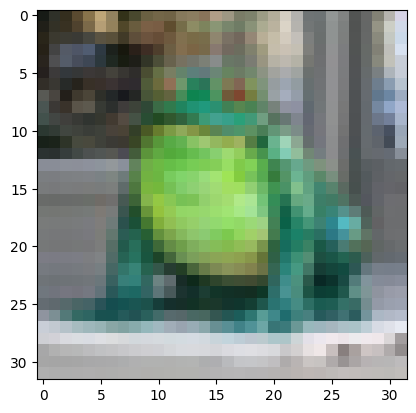

In [ ]:
plt.imshow(x_train[19])

#Normalizing And Reshaping

In [ ]:
x_train= x_train/255.0
x_test= x_test/255.0

#Categorizing

In [ ]:
y_train= utils.to_categorical(y_train)
y_test= utils.to_categorical(y_test)

#Building Model

In [ ]:
model= models.Sequential([
    layers.Conv2D(64,(3,3), activation= 'relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(32,(3,3), activation= 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    # layers.Conv2D(32,(3,3), activation= 'relu'),
    # layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(units= 20, activation='relu'),
    layers.Dense(units= 15, activation='relu'),
    # layers.Dropout(0.3),

    layers.Dense(units=10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#Compile

In [ ]:
model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

#EarlyStopping

In [ ]:
early_stop= callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#Training The Model

In [ ]:
history= model.fit(
    x_train, y_train,
    batch_size= 32,
    epochs=40,
    verbose= 1,
    validation_data=(x_test,y_test),
    callbacks=[early_stop]

)

Epoch 1/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 102s 64ms/step - accuracy: 0.2579 - loss: 1.9696 - val_accuracy: 0.4538 - val_loss: 1.5119
Epoch 2/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 61ms/step - accuracy: 0.4856 - loss: 1.3950 - val_accuracy: 0.5455 - val_loss: 1.2575
Epoch 3/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 58ms/step - accuracy: 0.5560 - loss: 1.2297 - val_accuracy: 0.5321 - val_loss: 1.2927
Epoch 4/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 96s 61ms/step - accuracy: 0.5826 - loss: 1.1629 - val_accuracy: 0.5782 - val_loss: 1.1819
Epoch 5/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 61ms/step - accuracy: 0.6076 - loss: 1.0960 - val_accuracy: 0.6155 - val_loss: 1.1022
Epoch 6/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 93s 59ms/step - accuracy: 0.6317 - loss: 1.0424 - val_accuracy: 0.6297 - val_loss: 1.0577
Epoch 7/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 60ms/step - accuracy: 0.6445 - loss: 1.0069 - val_accuracy: 0.6554 - val_loss: 0.9930
Epoch 8/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 60ms/step - accuracy: 0.6

#Evaluating Model

In [ ]:
loss, acc= model.evaluate(x_test, y_test)
print(f" Accuracy= {acc}\n Loss=      {loss}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.6863 - loss: 0.8980
 Accuracy= 0.6858000159263611
 Loss=      0.905590832233429


#Visualization

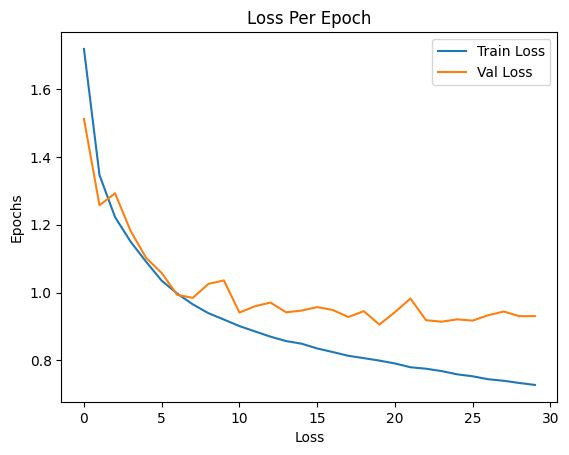

In [ ]:
plt.plot(history.history['loss'], label= 'Train Loss')
plt.plot(history.history['val_loss'], label= 'Val Loss')
plt.title('Loss Per Epoch')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend()
plt.show()

In [ ]:
cap= cv2.VideoCapture(0)

In [ ]:


class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',

               'dog', 'frog', 'horse', 'ship', 'truck']

cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read()

    if not ret: break

    img = cv2.resize(frame, (32, 32))

    img = img.astype("float32") / 255.0

    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)

    class_id = np.argmax(prediction)

    class_name = class_names[class_id]

    conf = np.max(prediction)

    cv2.putText(frame, f"Class: {class_name}, {conf *100 :.2f}", (10, 30),

                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2.rectangle(frame, (32,32),(32,32), color = (129,152,163))

    cv2.imshow("Live Classification", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):

        break

cap.release()

cv2.destroyAllWindows()

In [ ]:
import tensorflow as tf

tf.__version__

'2.19.0'

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras import models, layers, callbacks, datasets

(xtrain, ytrain), (xtest, ytest) = datasets.cifar10.load_data()

# Normalization (32, 32, 3)
xtrain = xtrain / 255.0
xtest = xtest / 255.0

# plt.imshow(xtrain[150])
# plt.show()

ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

model = models.Sequential([
    layers.Conv2D(32,(3,3), activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
earlyStop = callbacks.EarlyStopping(monitor='val_loss',patience=5, restore_best_weights= True)

history = model.fit(
    xtrain, ytrain,
    epochs = 100,
    batch_size = 80,
    callbacks=[earlyStop],
    validation_data=(xtest, ytest)
)

loss, acc = model.evaluate(xtest, ytest)
print('Accuracy : ', acc)

model.save('Model.h5')
print('Saved')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 92ms/step - accuracy: 0.3278 - loss: 1.8322 - val_accuracy: 0.5169 - val_loss: 1.3591
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - accuracy: 0.5372 - loss: 1.3049 - val_accuracy: 0.6028 - val_loss: 1.1306
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - accuracy: 0.5954 - loss: 1.1442 - val_accuracy: 0.6282 - val_loss: 1.0613
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 86ms/step - accuracy: 0.6248 - loss: 1.0565 - val_accuracy: 0.6494 - val_loss: 0.9985
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 84ms/step - accuracy: 0.6557 - loss: 0.9746 - val_accuracy: 0.6597 - val_loss: 0.9591
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 85ms/step - accuracy: 0.6753 - loss: 0.9252 - val_accuracy: 0.6809 - val_loss: 0.9167
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - accuracy: 0.6906 - loss: 0.8732 - val_accuracy: 0.6664 - val_loss: 0.9664
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - accuracy: 0.7050 - loss: 0

Accuracy :  0.7031000256538391
Saved


In [ ]:
pip install -- upgrade opencv-python

ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade


In [ ]:
import cv2
cap=cv2.VideoCapture(0, cv2.CAP_DSHOW)

if not cap.isOpened():
  print ('cannot open camera ')
  exit()


while True:
  ret,frame= cap.read()
  if not ret:
    print('Failed To Grap Frame')
    break
  cv2.imshow('Live', frame)
  if cv2.waitKey(1) & 0xFF== ord('q'):
    break

cap.release()
cv2.destroyAllWindows()


cannot open camera 
Failed To Grap Frame
